# Evaluating the correlation between columns using a heatmap

Uncovering underlying data structures.

<a id="importing"></a>
## Importing libraries and packages

In [1]:
# Mathematical operations and data manipulation
import pandas as pd

# Plotting
import seaborn as sns

# Warnings
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

<a id="set-paths"></a>
## Set paths

In [2]:
# Path to datasets directory
data_path = "./datasets"
# Path to assets directory (for saving results to)
assets_path = "./assets"

<a id="loading-data"></a>
## Loading dataset

In [3]:
# load data
dataset = pd.read_csv(f"{data_path}/preprocessed_default_credit.csv")
dataset.head().T

0       1      2      3      4
ID             1       2      3      4      5
LIMIT_BAL  20000  120000  90000  50000  50000
SEX            2       2      2      2      1
EDUCATION      2       2      2      2      2
MARRIAGE       1       2      2      1      1
AGE           24      26     34     37     57
PAY_1          2      -1      0      0     -1
PAY_2          2       2      0      0      0
PAY_3         -1       0      0      0     -1
PAY_4         -1       0      0      0      0
PAY_5         -2       0      0      0      0
PAY_6         -2       2      0      0      0
BILL_AMT1   3913    2682  29239  46990   8617
BILL_AMT2   3102    1725  14027  48233   5670
BILL_AMT3    689    2682  13559  49291  35835
BILL_AMT4      0    3272  14331  28314  20940
BILL_AMT5      0    3455  14948  28959  19146
BILL_AMT6      0    3261  15549  29547  19131
PAY_AMT1       0       0   1518   2000   2000
PAY_AMT2     689    1000   1500   2019  36681
PAY_AMT3       0    1000   1000   1200  10000
PAY_AMT4       0    1000   1000   1100   9000
PAY_AMT5       0       0   1000   1069    689
PAY_AMT6       0    2000   5000   1000    679
DEFAULT        1       1      0      0      0

<a id="exploring-data"></a>
## Exploring dataset

In [4]:
# Printing dimensionality of the data, columns, types and missing values
print(f"Data dimension: {dataset.shape}")
for col in dataset.columns:
    print(
        f"Column: {col:35} | "
        f"type: {str(dataset[col].dtype):7} | "
        f"missing values: {dataset[col].isna().sum():3d}"
    )

Data dimension: (30000, 25)
Column: ID                                  | type: int64   | missing values:   0
Column: LIMIT_BAL                           | type: int64   | missing values:   0
Column: SEX                                 | type: int64   | missing values:   0
Column: EDUCATION                           | type: int64   | missing values:   0
Column: MARRIAGE                            | type: int64   | missing values:   0
Column: AGE                                 | type: int64   | missing values:   0
Column: PAY_1                               | type: int64   | missing values:   0
Column: PAY_2                               | type: int64   | missing values:   0
Column: PAY_3                               | type: int64   | missing values:   0
Column: PAY_4                               | type: int64   | missing values:   0
Column: PAY_5                               | type: int64   | missing values:   0
Column: PAY_6                               | type: int64   | missing 

In [5]:
# Computing statistics on numerical features
dataset.describe().T

count           mean            std       min       25%  \
ID         30000.0   15000.500000    8660.398374       1.0   7500.75   
LIMIT_BAL  30000.0  167484.322667  129747.661567   10000.0  50000.00   
SEX        30000.0       1.603733       0.489129       1.0      1.00   
EDUCATION  30000.0       1.842267       0.744494       1.0      1.00   
MARRIAGE   30000.0       1.555467       0.518137       1.0      1.00   
AGE        30000.0      35.485500       9.217904      21.0     28.00   
PAY_1      30000.0      -0.016700       1.123802      -2.0     -1.00   
PAY_2      30000.0      -0.133767       1.197186      -2.0     -1.00   
PAY_3      30000.0      -0.166200       1.196868      -2.0     -1.00   
PAY_4      30000.0      -0.220667       1.169139      -2.0     -1.00   
PAY_5      30000.0      -0.266200       1.133187      -2.0     -1.00   
PAY_6      30000.0      -0.291100       1.149988      -2.0     -1.00   
BILL_AMT1  30000.0   51223.330900   73635.860576 -165580.0   3558.75   
BILL_AMT2  30000.0   49179.075167   71173.768783  -69777.0   2984.75   
BILL_AMT3  30000.0   47013.154800   69349.387427 -157264.0   2666.25   
BILL_AMT4  30000.0   43262.948967   64332.856134 -170000.0   2326.75   
BILL_AMT5  30000.0   40311.400967   60797.155770  -81334.0   1763.00   
BILL_AMT6  30000.0   38871.760400   59554.107537 -339603.0   1256.00   
PAY_AMT1   30000.0    5663.580500   16563.280354       0.0   1000.00   
PAY_AMT2   30000.0    5921.163500   23040.870402       0.0    833.00   
PAY_AMT3   30000.0    5225.681500   17606.961470       0.0    390.00   
PAY_AMT4   30000.0    4826.076867   15666.159744       0.0    296.00   
PAY_AMT5   30000.0    4799.387633   15278.305679       0.0    252.50   
PAY_AMT6   30000.0    5215.502567   17777.465775       0.0    117.75   
DEFAULT    30000.0       0.221200       0.415062       0.0      0.00   

                50%        75%        max  
ID          15000.5   22500.25    30000.0  
LIMIT_BAL  140000.0  240000.00  1000000.0  
SEX             2.0       2.00        2.0  
EDUCATION       2.0       2.00        4.0  
MARRIAGE        2.0       2.00        3.0  
AGE            34.0      41.00       79.0  
PAY_1           0.0       0.00        8.0  
PAY_2           0.0       0.00        8.0  
PAY_3           0.0       0.00        8.0  
PAY_4           0.0       0.00        8.0  
PAY_5           0.0       0.00        8.0  
PAY_6           0.0       0.00        8.0  
BILL_AMT1   22381.5   67091.00   964511.0  
BILL_AMT2   21200.0   64006.25   983931.0  
BILL_AMT3   20088.5   60164.75  1664089.0  
BILL_AMT4   19052.0   54506.00   891586.0  
BILL_AMT5   18104.5   50190.50   927171.0  
BILL_AMT6   17071.0   49198.25   961664.0  
PAY_AMT1     2100.0    5006.00   873552.0  
PAY_AMT2     2009.0    5000.00  1684259.0  
PAY_AMT3     1800.0    4505.00   896040.0  
PAY_AMT4     1500.0    4013.25   621000.0  
PAY_AMT5     1500.0    4031.50   426529.0  
PAY_AMT6     1500.0    4000.00   528666.0  
DEFAULT         0.0       0.00        1.0

<a id="correlations"></a>
## Correlations

<AxesSubplot:>

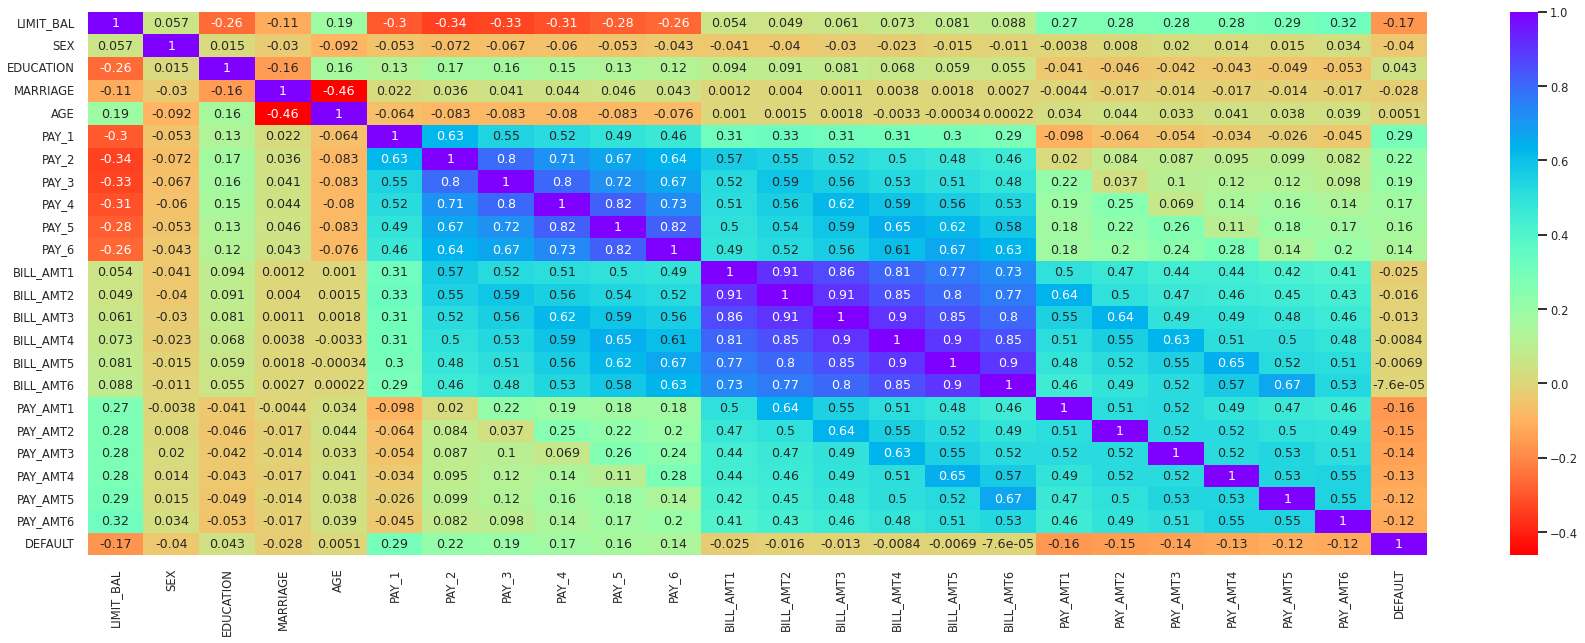

In [6]:
sns.set(rc={"figure.figsize": (30, 10)})
sns.set_context("talk", font_scale=0.7)
sns.heatmap(
    dataset.iloc[:, 1:].corr(method="spearman"), cmap="rainbow_r", annot=True
)

In [7]:
# Exact correlation coefficients
dataset.drop("DEFAULT", axis=1).apply(
    lambda x: x.corr(dataset.DEFAULT, method="spearman")
)

ID          -0.013952
LIMIT_BAL   -0.169586
SEX         -0.039961
EDUCATION    0.043425
MARRIAGE    -0.028174
AGE          0.005149
PAY_1        0.292213
PAY_2        0.216919
PAY_3        0.194771
PAY_4        0.173690
PAY_5        0.159043
PAY_6        0.142523
BILL_AMT1   -0.025327
BILL_AMT2   -0.015554
BILL_AMT3   -0.012670
BILL_AMT4   -0.008357
BILL_AMT5   -0.006851
BILL_AMT6   -0.000076
PAY_AMT1    -0.160493
PAY_AMT2    -0.150977
PAY_AMT3    -0.139388
PAY_AMT4    -0.127979
PAY_AMT5    -0.116587
PAY_AMT6    -0.121444
dtype: float64